# STEP 1-3

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
from dsiad_functions import Solution_UML
from dsiad_functions import plots
solution = Solution_UML()
plot = plots()   

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


Solutions loaded...



In the previous module we have prepared the data by imputing the mean for missing values, removing highly correlated features and removing features with very low variance. We will reuse our prepared dataset, by loading the data saved at the end of the previous module.

In [2]:
wine = pd.read_csv("winequality-red_3.csv") 
X = wine.drop(["quality"], axis = 1)

In Unsupervised Machine Learning we only use the features, to look for hidden patterns in the data. We do not have a target or `y`. We set the features to `X`. 

# STEP 4: Feature Engineering

Before clustering, we normalize our dataset. This means that we set the mean of every column to zero and calculate each value relative to this mean. By doing this, each columns has the same range of values, which makes it more suitable for comparison.

Let's first check our dataset with the function we have learned! 

In [3]:
X.head() ## REMOVE BEFORE USE ##

,price,fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,12.032196,7.4,0.70,0.00,1.9,11.0,34.0,3.51,0.56,9.4
1,13.444977,7.8,0.88,0.00,2.6,25.0,67.0,3.20,0.68,9.8
2,12.520701,7.8,0.76,0.04,2.3,15.0,54.0,3.26,0.65,9.8
3,15.726190,11.2,0.28,0.56,1.9,17.0,60.0,3.16,0.58,9.8
4,11.829749,7.4,0.70,0.00,1.9,11.0,34.0,3.51,0.56,9.4


Now, we are going to apply normalization. Remember the formula for normalization is: (X - the minimum of X) / (the maximum of X - the minimum of X). 

You can use the following functions: 
`.min()` gives the minimum 
`.max()` gives the maximum

View the difference between X and X_normalized afterwards.

In [4]:
X_normalized = ((X-X.min())/(X.max()-X.min())) ## REMOVE BEFORE USE ## 

X_normalized.head()

,price,fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,0.348286,0.247788,0.397260,0.00,0.068493,0.140845,0.098940,0.606299,0.137725,0.153846
1,0.458652,0.283186,0.520548,0.00,0.116438,0.338028,0.215548,0.362205,0.209581,0.215385
2,0.386448,0.283186,0.438356,0.04,0.095890,0.197183,0.169611,0.409449,0.191617,0.215385
3,0.636859,0.584071,0.109589,0.56,0.068493,0.225352,0.190813,0.330709,0.149701,0.215385
4,0.332471,0.247788,0.397260,0.00,0.068493,0.140845,0.098940,0.606299,0.137725,0.153846


In [5]:
solution.step_4()

X_normalized = ((X-X.min())/(X.max()-X.min()))


# STEP 5: Feature selection 

We allready selected our features! 

# STEP 6: Modelling

## 6.1 Selecting the number of clusters

When we use a k-means clustering technique, we should select the number of clusters beforehand. One way to do this is the elbow method. We want to look for the elbow, the point where the slope suddenly decreases. How to select the right number of clusters? A good cluster should have tight clusters, but not too many clusters. A simple rule of thumb is to find the elbow of the graph. 

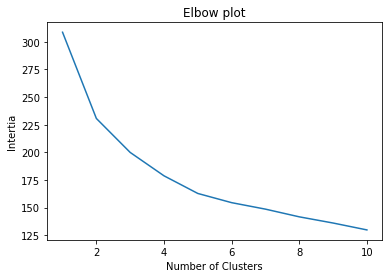

In [6]:
plot.elbow_plot(X_normalized)

Where do you think the elbow is? What is our optimal number of cluster? Test the results later for different numbers of clusters!

In [35]:
number_clusters = 4 ## REMOVE BEFORE USING ##

You can check the amount of clusters below. Fill out the number of clusters in the solution function. 

In [7]:
solution.step_61(1)

The amount of clusters selected is too low!
Good job, try out different numbers for k too!


## 6.2 K-means clustering of the data

Here, we define our model by the function `KMeans()` and fit the model to our dataset `X_normalized`. In the image you see an example of how the kmeans algorithm works with k = 3. 



<center>
<img src="images/k-means.gif" width="300"><br/>
</center>


In [36]:
kmeans = KMeans(n_clusters = number_clusters).fit(X_normalized)

Next, we are using the fitted model to determine the cluster for each row of our data set by `.predict()`. 

In [37]:
cluster_pred = kmeans.predict(X_normalized)

Finally, we add the cluster numbers to our (non-normalized) dataset. You can see a new colomn `cluster` that shows to which cluster the observation belongs based on our model. 

In [38]:
wine["cluster"] = cluster_pred
wine.head()

,price,fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,cluster
0,12.032196,7.4,0.70,0.00,1.9,11.0,34.0,3.51,0.56,9.4,0,0
1,13.444977,7.8,0.88,0.00,2.6,25.0,67.0,3.20,0.68,9.8,0,0
2,12.520701,7.8,0.76,0.04,2.3,15.0,54.0,3.26,0.65,9.8,0,0
3,15.726190,11.2,0.28,0.56,1.9,17.0,60.0,3.16,0.58,9.8,1,3
4,11.829749,7.4,0.70,0.00,1.9,11.0,34.0,3.51,0.56,9.4,0,0


# STEP 7: Reviewing results
## 7.1 Inspect centroids

To see whether the clusters make sense, we can compare the values of the centroids of the different clusters. Remember, we want to see that next to compactness, isolation is optimized. This means that the centroids have different locations. Because we normalized the dataset, the location can be between 0 and 1. If one centroid is 0 and the other 1, than they have maximum distance. If one centroid is at 0.5 and the other at 0.51, they are fairly close and the clusters are highly likely to have overlap. Let's look at `kmean-cluster_centers`.

In [39]:
#returns the coordinates of the centers
pd.DataFrame(kmeans.cluster_centers_ , columns = X.columns)

,price,fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,0.410592,0.255391,0.362439,0.106697,0.091199,0.154663,0.103743,0.497356,0.158856,0.237318
1,0.623620,0.217005,0.246970,0.215108,0.097960,0.236498,0.124272,0.537586,0.210593,0.523197
2,0.404987,0.317126,0.281426,0.302176,0.150081,0.370112,0.297163,0.424386,0.192885,0.210083
3,0.525078,0.507513,0.190899,0.495644,0.118732,0.135205,0.083357,0.350790,0.239030,0.349655


## 7.2 Inspect clusters in pairs 
It is not possible to visualize the clusters with all features at once. However, we can inspect the combination of 2 different features and see if the clusters are showing in the data. We do this with the use of `plt.scatter()` by the input argument `c=cluster-pred` we tell that we would like to have different colours for the different clusters. Inspect the clusters: would you define them as a cluster when seeing them visually? Try different combinations of features!

Text(0.5,1,'Clustering of the wine')

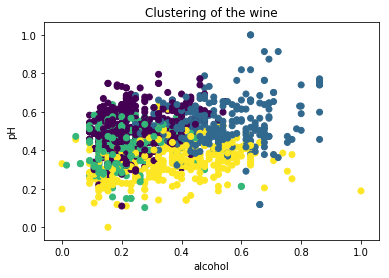

In [40]:
X_normalized.columns = X.columns

x_column = "alcohol" ## CHANGE VARIABLE ##
y_column = "pH"  ## CHANGE VARIABLE ##

plt.scatter(X_normalized[x_column], X_normalized[y_column], c=cluster_pred)
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title("Clustering of the wine")

## 7.3 Characteristics of the wine per cluster

We would like to inspect the difference in characteristics per cluster. With that information, we can determine what wine would suit which occasion! 

In [54]:
cluster_means = wine.groupby('cluster').mean().transpose()

cluster_means

cluster,0,1,2,3
price,12.829773,15.556717,12.758014,14.295296
fixed acidity,7.485921,7.052158,8.183529,10.334895
volatile acidity,0.649161,0.480576,0.530882,0.398712
citric acid,0.106697,0.215108,0.302176,0.495644
residual sugar,2.231498,2.330216,3.091176,2.633489
free sulfur dioxide,11.981047,17.791367,27.277941,10.599532
total sulfur dioxide,35.359206,41.169065,90.097059,29.590164
pH,3.371643,3.422734,3.278971,3.185504
sulphates,0.595289,0.681691,0.652118,0.729180
alcohol,9.942569,11.800779,9.765539,10.672756


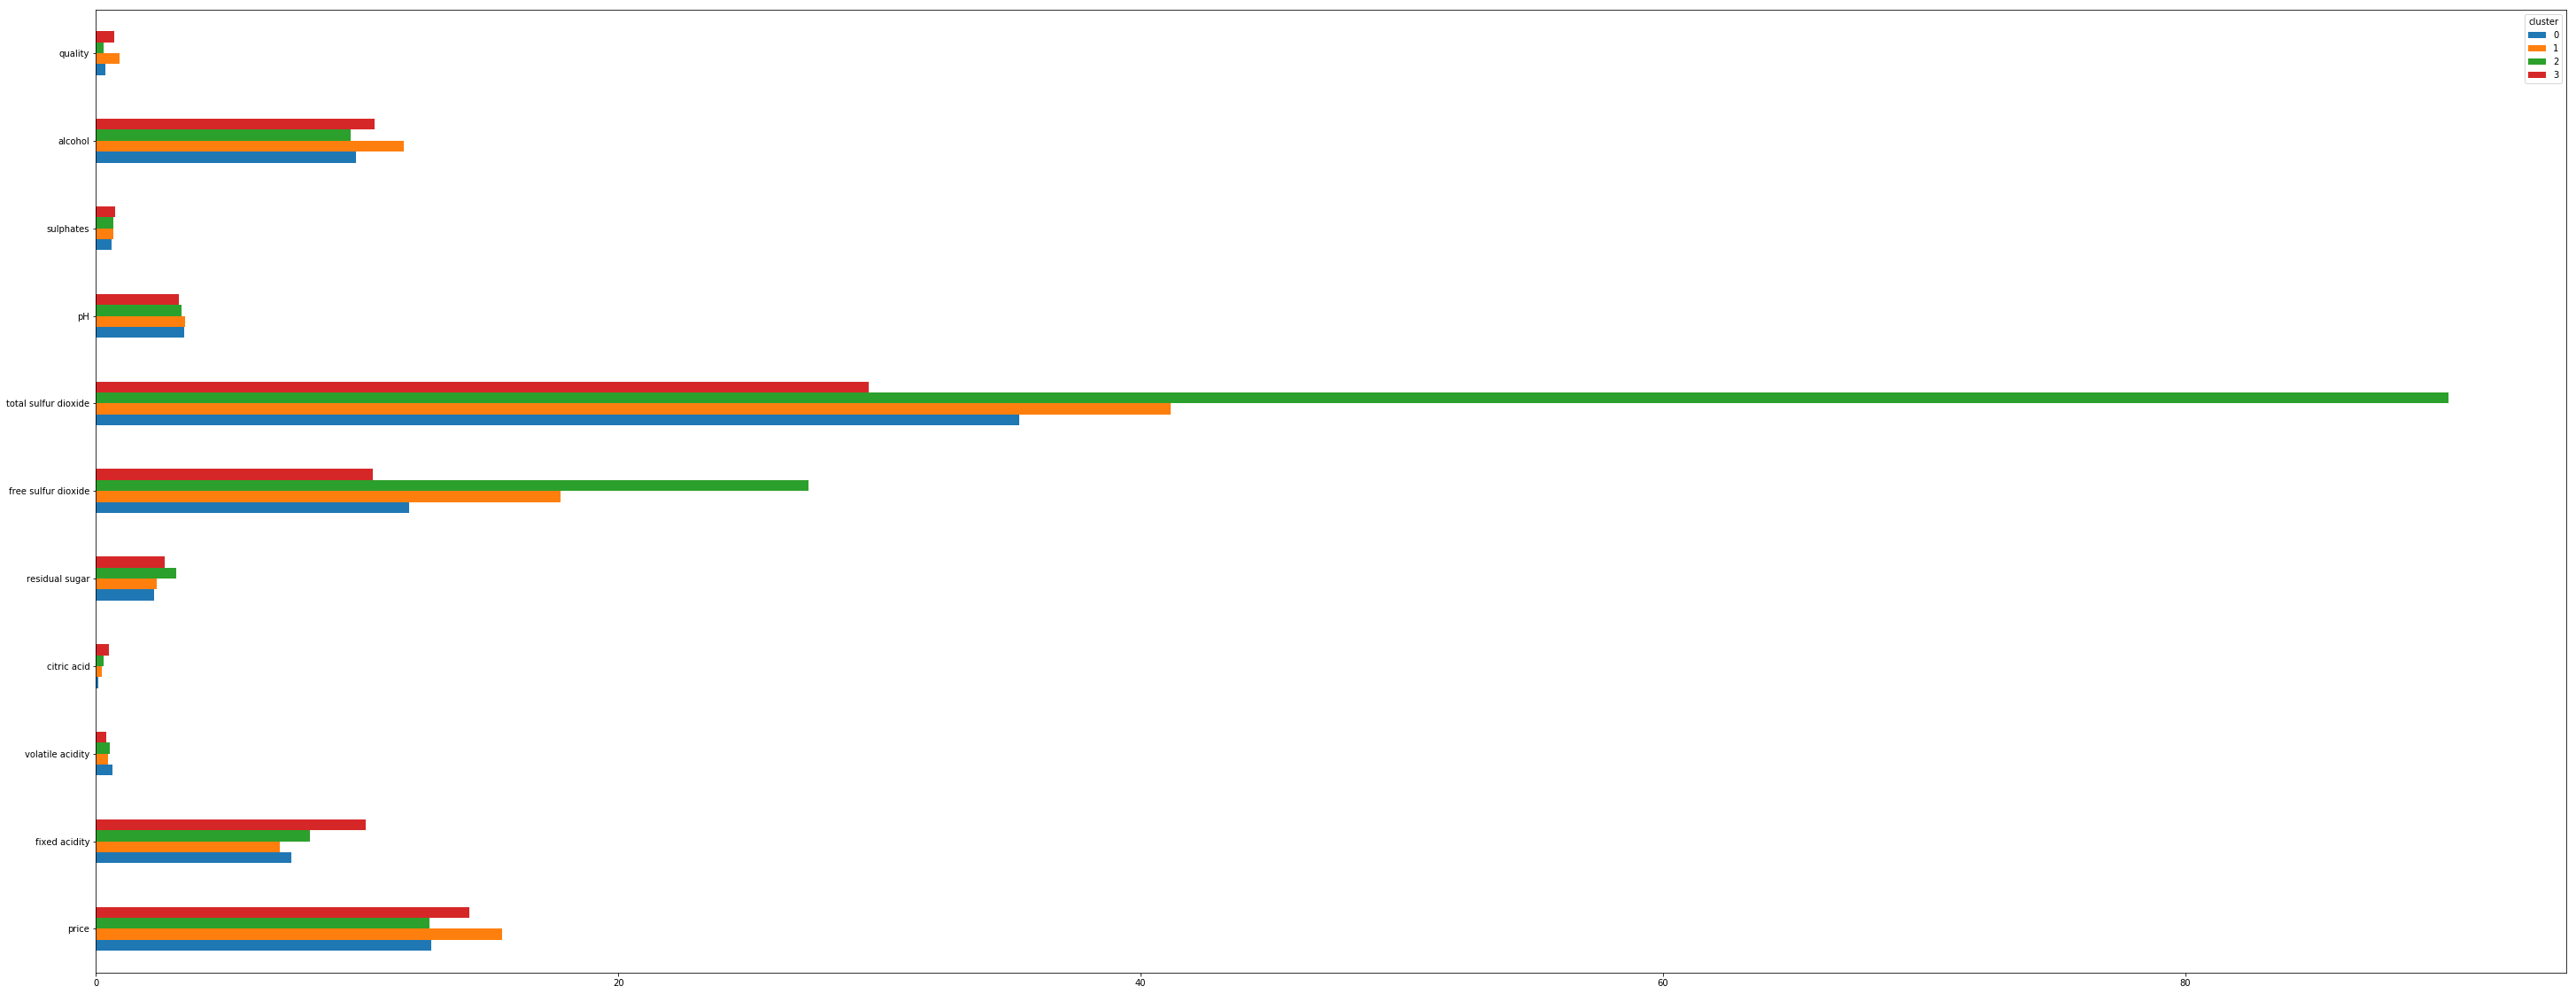

In [81]:
cluster_means.plot.barh()